# Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

**1.** Сгенерируйте из него выборку объёма 1000. Выбрано распределение Пуассона $\lambda$ = 3.

In [19]:
poisson_rv = sts.poisson(3)
sample = poisson_rv.rvs(1000)

**2.** Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Text(0.5, 0, '$x$')

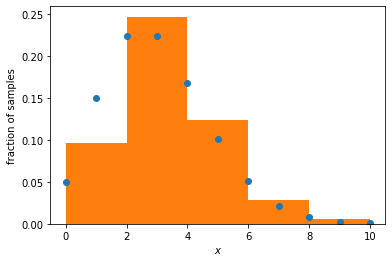

In [28]:
x = np.linspace(0,10,11)
pdf = poisson_rv.pmf(x)
plt.plot(x, pdf, 'o', alpha=1)
plt.hist(sample, bins=5, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок.

**3.** Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n. И постройте гистограммы распределений их выборочных средних. 

Text(0.5, 0, '$x$')

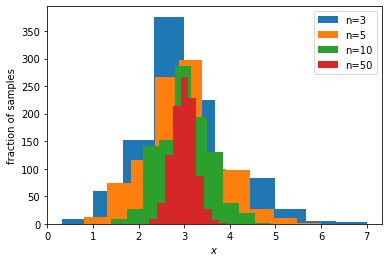

In [30]:
n = [3, 5, 10, 50] # объём выборок 
sample_mean3 = np.zeros(1000)
sample_mean5 = np.zeros(1000)
sample_mean10 = np.zeros(1000)
sample_mean50 = np.zeros(1000)
for i in range(1000): 
    sample3 = poisson_rv.rvs(n[0])
    sample_mean3[i] = np.average(sample3)
    sample5 = poisson_rv.rvs(n[1])
    sample_mean5[i] = np.average(sample5)
    sample10 = poisson_rv.rvs(n[2])
    sample_mean10[i] = np.average(sample10)
    sample50 = poisson_rv.rvs(n[3])
    sample_mean50[i] = np.average(sample50)

plt.hist(sample_mean3, bins=10, label='n=3')
plt.hist(sample_mean5, bins=10, label='n=5')
plt.hist(sample_mean10, bins=10, label='n=10')
plt.hist(sample_mean50, bins=10, label='n=50')
plt.legend()
plt.ylabel('fraction of samples')
plt.xlabel('$x$')


**4.** Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Для распределения Пуассона математическое ожидание $\mu = \lambda$, дисперсия $D = \lambda$.
Воспользовавшись центральной предельной теоремой получаем: $$ \bar p_n \approx \sim N \left ( EX,\frac{DX}{n} \right ) = N \left ( \lambda,\frac{\lambda}{n} \right ) $$


Получим следующее распределение:

Text(0.5, 0, '$x$')

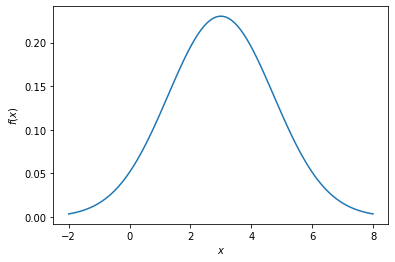

In [34]:
mu = 3
sigma = np.sqrt(3)

norm_rv = sts.norm(loc=mu, scale=sigma)

x = np.linspace(-2,8,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

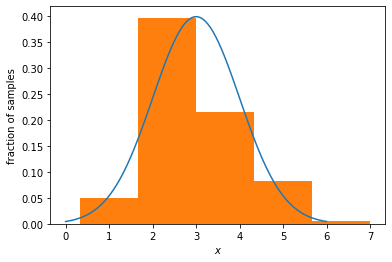

In [38]:
sigma3 = np.sqrt(3/3)
norm_rv3 = sts.norm(loc=mu, scale=sigma3)
x = np.linspace(0,6,100)
pdf = norm_rv3.pdf(x)
plt.plot(x, pdf, alpha=1)
plt.hist(sample_mean3, bins=5, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

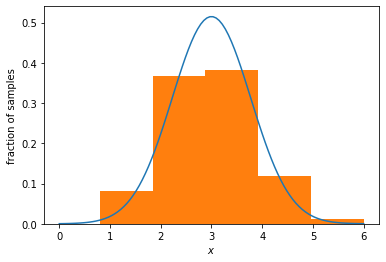

In [39]:
sigma5 = np.sqrt(3/5)
norm_rv5 = sts.norm(loc=mu, scale=sigma5)
x = np.linspace(0,6,100)
pdf = norm_rv5.pdf(x)
plt.plot(x, pdf, alpha=1)
plt.hist(sample_mean5, bins=5, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

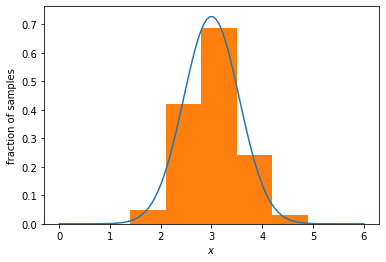

In [40]:
sigma10 = np.sqrt(3/10)
norm_rv10 = sts.norm(loc=mu, scale=sigma10)
x = np.linspace(0,6,100)
pdf = norm_rv10.pdf(x)
plt.plot(x, pdf, alpha=1)
plt.hist(sample_mean10, bins=5, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

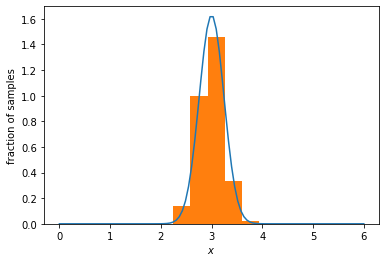

In [41]:
sigma50 = np.sqrt(3/50)
norm_rv50 = sts.norm(loc=mu, scale=sigma50)
x = np.linspace(0,6,100)
pdf = norm_rv50.pdf(x)
plt.plot(x, pdf, alpha=1)
plt.hist(sample_mean50, bins=5, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

**Вывод:** Чем больше объём выборки $n$, тем точнее математическое ожидание и дисперсия выборочных средних соответсвуют теоретическим значениям полученным по формуле центральной предельной теоремы.